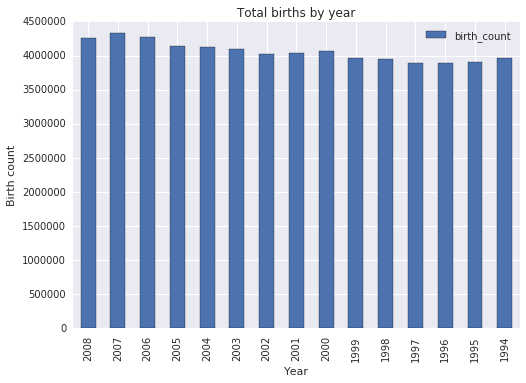

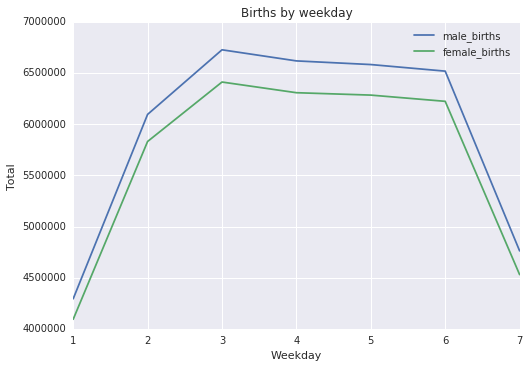

In [1]:
# Ejemplo de llamada a la API de BQ

import google.datalab.bigquery as bq

total_births = bq.Query('SELECT CAST(source_year AS string) AS year, COUNT(is_male) AS birth_count FROM `publicdata.samples.natality` GROUP BY year ORDER BY year DESC LIMIT 15')
df = total_births.execute(output_options=bq.QueryOutput.dataframe()).result()
df.head(10)

ax = df.plot(kind='bar',x='year',title='Total births by year')
ax.set_xlabel('Year')
ax.set_ylabel('Birth count')

births_by_weekday = bq.Query('SELECT CAST(wday AS string) AS weekday, SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births, SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births FROM `publicdata.samples.natality` WHERE wday IS NOT NULL GROUP BY weekday ORDER BY weekday ASC')
df2 = births_by_weekday.execute(output_options=bq.QueryOutput.dataframe()).result()

df2 = births_by_weekday.execute(output_options=bq.QueryOutput.dataframe()).result()
ax = df2.plot(kind='line',x='weekday',title='Births by weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total')
|

In [1]:
# Ejemplo de llamada 'mágica' a BQ

import google.datalab.bigquery as bq
import pandas as pd

In [2]:
%%bq query -n taxi_queries
SELECT trip_seconds, trip_miles, pickup_latitude, pickup_longitude, fare
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_miles IS NOT NULL AND
      trip_seconds IS NOT NULL AND
      pickup_latitude IS NOT NULL AND 
      pickup_longitude IS NOT NULL AND
      fare IS NOT NULL
LIMIT 300000



In [3]:
df = taxi_queries.execute(output_options=bq.QueryOutput.dataframe()).result()

In [7]:
from sklearn.model_selection import train_test_split

dataset = df.as_matrix()


X_train, X_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [14]:
import numpy as np
import tensorflow
import tensorflow as tf
import sys
import tensorflow.contrib.keras as keras

In [ ]:
from keras.regularizers import l1,l2
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.constraints import max_norm
from keras.optimizers import RMSprop, Adam
from keras.layers.normalization import BatchNormalization
import os

# Disable info warnings from TF
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'




In [ ]:
# Hyperparameters
batch_size = 500
epochs = 100
dropout_rate = 0.5

x_train = X_train
y_train = y_train
x_val = X_val
y_val = y_val
x_test = X_test
y_test = y_test

input_dim = dataset.shape[1] - 1

model = Sequential()
model.add(Dense(2,input_shape=(input_dim,), init='he_normal'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(Dropout(dropout_rate))
model.add(Dense(1))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=Adam(),
              metrics=[keras.metrics.mean_squared_error,keras.metrics.mean_absolute_error, keras.metrics.mean_absolute_percentage_error])


history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss (mse):', score[0])
print('Test mae:', score[2])
print('Test mape:', score[3])

y_pred = model.predict_proba(x_test, verbose = 0)




In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_title('Chicago taxi trips prediction')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()